In [6]:
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if (!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse, httr,jsonlite, srvyr,showtext)
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)
font_add_google("Poppins", "pop")
showtext_auto()

Using GitHub PAT from the git credential store.



rlang    (1.1.4 -> 1.1.6) [CRAN]
glue     (1.7.0 -> 1.8.0) [CRAN]
cli      (3.6.3 -> 3.6.5) [CRAN]
magrittr (2.0.3 -> 2.0.4) [CRAN]
tibble   (3.2.1 -> 3.3.0) [CRAN]
ggplot2  (3.5.2 -> 4.0.0) [CRAN]


Installing 6 packages: rlang, glue, cli, magrittr, tibble, ggplot2

Warning message:
"packages 'tibble', 'ggplot2' are in use and will not be installed"
Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"


package 'magrittr' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'magrittr'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\magrittr\libs\x64\magrittr.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\magrittr\libs\x64\magrittr.dll: Permission denied"
Warning message:
"restored 'magrittr'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\RtmpMjEiGK\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\RtmpMjEiGK\remotes700c55c438a0\cpyp-ipdp-funcionespgd-6fd64b9/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Warning message:
"package 'funcionespgd' is in use and will not be installed"


In [7]:
# Función para descargar y descomprimir
download_unzip <- function(url, path) {

  r <- httr::GET(url, httr::write_disk(path, overwrite = TRUE))


  unzip(path, exdir = dirname(path))
}

In [8]:
years<-c("2004","2009","2014","2019","2024")
url_basicacdmx<-"https://www.inegi.org.mx/contenidos/programas/ce/2019/"
segunda_partecdmx<-"Datosabiertos/ce"
fincdmx<-"_cdmx_csv.zip"

In [9]:
years <- c("2004","2009","2014","2019","2024")

url_basicacdmx <- "https://www.inegi.org.mx/contenidos/programas/ce/2019/"
segunda_partecdmx  <- "/Datosabiertos/ce"
fincdmx  <- "_cdmx_csv.zip"


In [10]:
for (year in years) {

  if (year == "2024") {
    # --- URL especial 2024 ---
    url <- "https://www.inegi.org.mx/contenidos/programas/ce/2024/datosabiertos/conjunto_de_datos_ce_cdmx_2024_csv.zip"
  } else {
    # --- URLs estándar 2004-2019 ---
    url <- paste0(url_basicacdmx, segunda_partecdmx, year, fincdmx)
  }

  print(url)

  # crear carpeta destino
  dir.create(paste0("data/", year), showWarnings = FALSE, recursive = TRUE)

  # descargar y descomprimir
  download_unzip(url, paste0("data/", year, ".zip"))
}

[1] "https://www.inegi.org.mx/contenidos/programas/ce/2019//Datosabiertos/ce2004_cdmx_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/ce/2019//Datosabiertos/ce2009_cdmx_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/ce/2019//Datosabiertos/ce2014_cdmx_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/ce/2019//Datosabiertos/ce2019_cdmx_csv.zip"
[1] "https://www.inegi.org.mx/contenidos/programas/ce/2024/datosabiertos/conjunto_de_datos_ce_cdmx_2024_csv.zip"


In [15]:
file_names <- list.files(
  path = "data/conjunto_de_datos",
  pattern = "(^ce[0-9]{4}_cdmx.*\\.csv$)|(^tr_ce_cdmx_2024.*\\.csv$)",
  full.names = TRUE
)
dataframes <- map(file_names, ~ {

  df <- read.csv(.x, stringsAsFactors = FALSE, header = FALSE)

  colnames(df) <- df[1, ]
  df <- df[-1, ]   # remover encabezado duplicado
  # ---- renombrar solo si año es 2024 ----
  if (year == "2024" && "E04" %in% names(df)) {
      names(df)[names(df) == "E04"] <- "MUNICIPIO"
  }
  # extraer año del nombre del archivo
  year <- stringr::str_extract(basename(.x), "[0-9]{4}")
  df$year <- year



  df
})


In [16]:
censoscdmx <- bind_rows(dataframes)%>%
janitor::clean_names()%>%
mutate(municipio = trimws(municipio),
         codigo = trimws(codigo),
         id_estrato = trimws(id_estrato))%>%
 filter(municipio=="")%>%
 filter(id_estrato=="")%>%
 filter((codigo=="" |codigo=="TOTAL DE SECTOR") | codigo=="5417")%>%
 select(year,codigo,h001a)%>%
 rename(po=h001a)%>%
 mutate(codigo=case_when((codigo=="" | codigo=="TOTAL DE SECTOR") ~ "total",
                         codigo=="5417" ~ "servicios_tecnicos_cdmx"),
                         po=as.numeric(po))%>%
    pivot_wider(names_from = "codigo", values_from = "po")%>%
    mutate(
    year=as.numeric(year),
    pct=100*servicios_tecnicos_cdmx/total
    
    )
censoscdmx

year,total,servicios_tecnicos_cdmx,pct
<dbl>,<dbl>,<dbl>,<dbl>
2004,2842874,1413,0.04970322
2009,3299325,1115,0.03379479
2014,3603572,2124,0.05894152
2019,4297134,4176,0.09718105
2024,3556589,4336,0.12191456


In [17]:
tcma_po<-((censoscdmx$pct[censoscdmx$year==2024]/censoscdmx$pct[censoscdmx$year==2004])^(1/(2024-2004))-1)

tcma_po

[1] 0.04588408

In [18]:
extendido_po<-data.frame(year=2025:2045)
extendido_po$pct<-censoscdmx$pct[censoscdmx$year==2024]*cumprod(rep(1+tcma_po,length(2025:2045)))
extendido_po%>%
mutate(pct=round(pct,2))

year,pct
<int>,<dbl>
2025,0.13
2026,0.13
2027,0.14
2028,0.15
2029,0.15
2030,0.16
2031,0.17
2032,0.17
2033,0.18


In [19]:
  serie_completa_po <- bind_rows(
    censoscdmx %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0, año_base = 2024,var = "pct"),

    extendido_po %>%
      dplyr::mutate(year = as.numeric(year)) %>%
      intervals(margen = 0.004, año_base = 2024,var="pct"))
serie_completa_po

year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2004,0.04970322,0.04970322,0.04970322
2009,0.03379479,0.03379479,0.03379479
2014,0.05894152,0.05894152,0.05894152
2019,0.09718105,0.09718105,0.09718105
2024,0.12191456,0.12191456,0.12191456
2025,0.12750850,0.12801854,0.12700050
2026,0.13335911,0.13442812,0.13229861
2027,0.13947817,0.14115861,0.13781774
2028,0.14587800,0.14822609,0.14356711


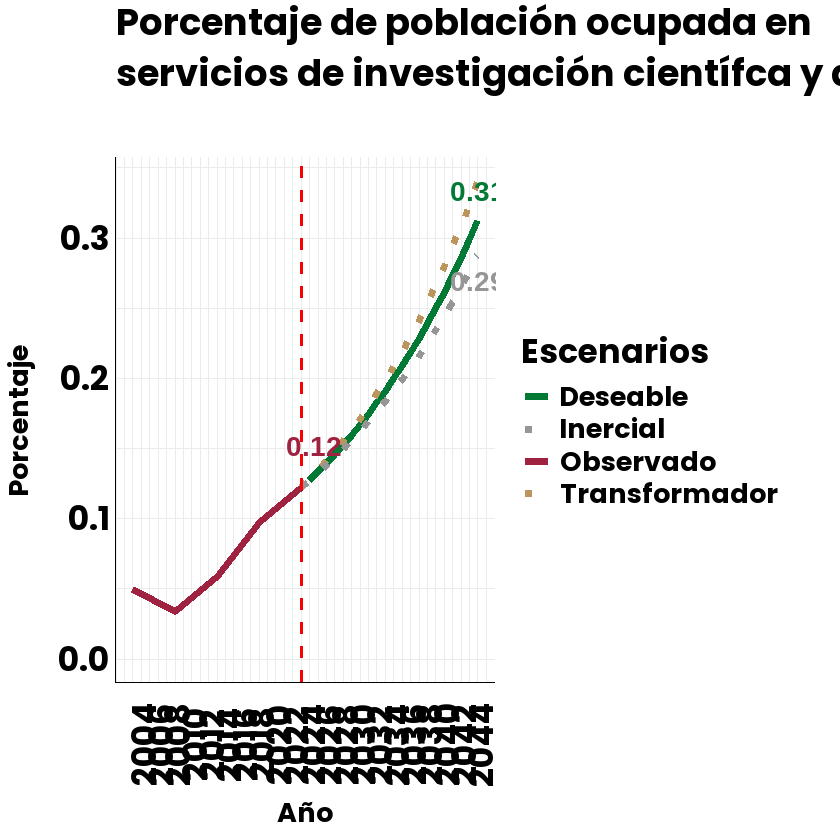

In [27]:
grafica_bonita(
  data = serie_completa_po,
  x = "year",
  y = "estimado",
  titulo = "Porcentaje de población ocupada en 
servicios de investigación científca y desarrollo en la Ciudad de México
",
    ano_base = 2024,
  mostrar_etiqueta_ano_base = TRUE,
  linea_vertical = 2024,
  anios_etiquetas = c(2045),
  desplazamiento_ano_base=c(1.5, 0.03),
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Porcentaje",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 0
)

ggsave("H:/Mi unidad/pgd/graficas/pdcti/pct_po_servicios_inv_cientif.png",
 width = 10, height = 8.5, dpi = 185, bg = "white")